<a href="https://colab.research.google.com/github/fabiacamile/diabetes_prediction/blob/main/Diabetes_prediction_Fabia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predição de diabetes com modelos de classificação


In [ ]:
#Importando as bibliotecas: manipulação de dados, df e gráficos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessamento dos dados
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#algoritmos de classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#metricas de avaliação dos modelos
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report, auc, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## Análise Exploratória

In [ ]:
#leitura do dataframe
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#estatistica descritiva dos dados
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#informações do tipo de dados de cada variável
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#identificação de variável categórica/contínua e diversidade de valores em cada coluna
df.nunique().sort_values()

,0
Outcome,2
Pregnancies,17
BloodPressure,47
SkinThickness,51
Age,52
Glucose,136
Insulin,186
BMI,248
DiabetesPedigreeFunction,517


In [ ]:
#Distribuição da variável alvo na database

df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
df.groupby('Outcome').mean().T

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


In [ ]:
#identificação de valores nulos
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#identificação de duplicadas
df.duplicated().sum()

0

### Distribuições e Correlações


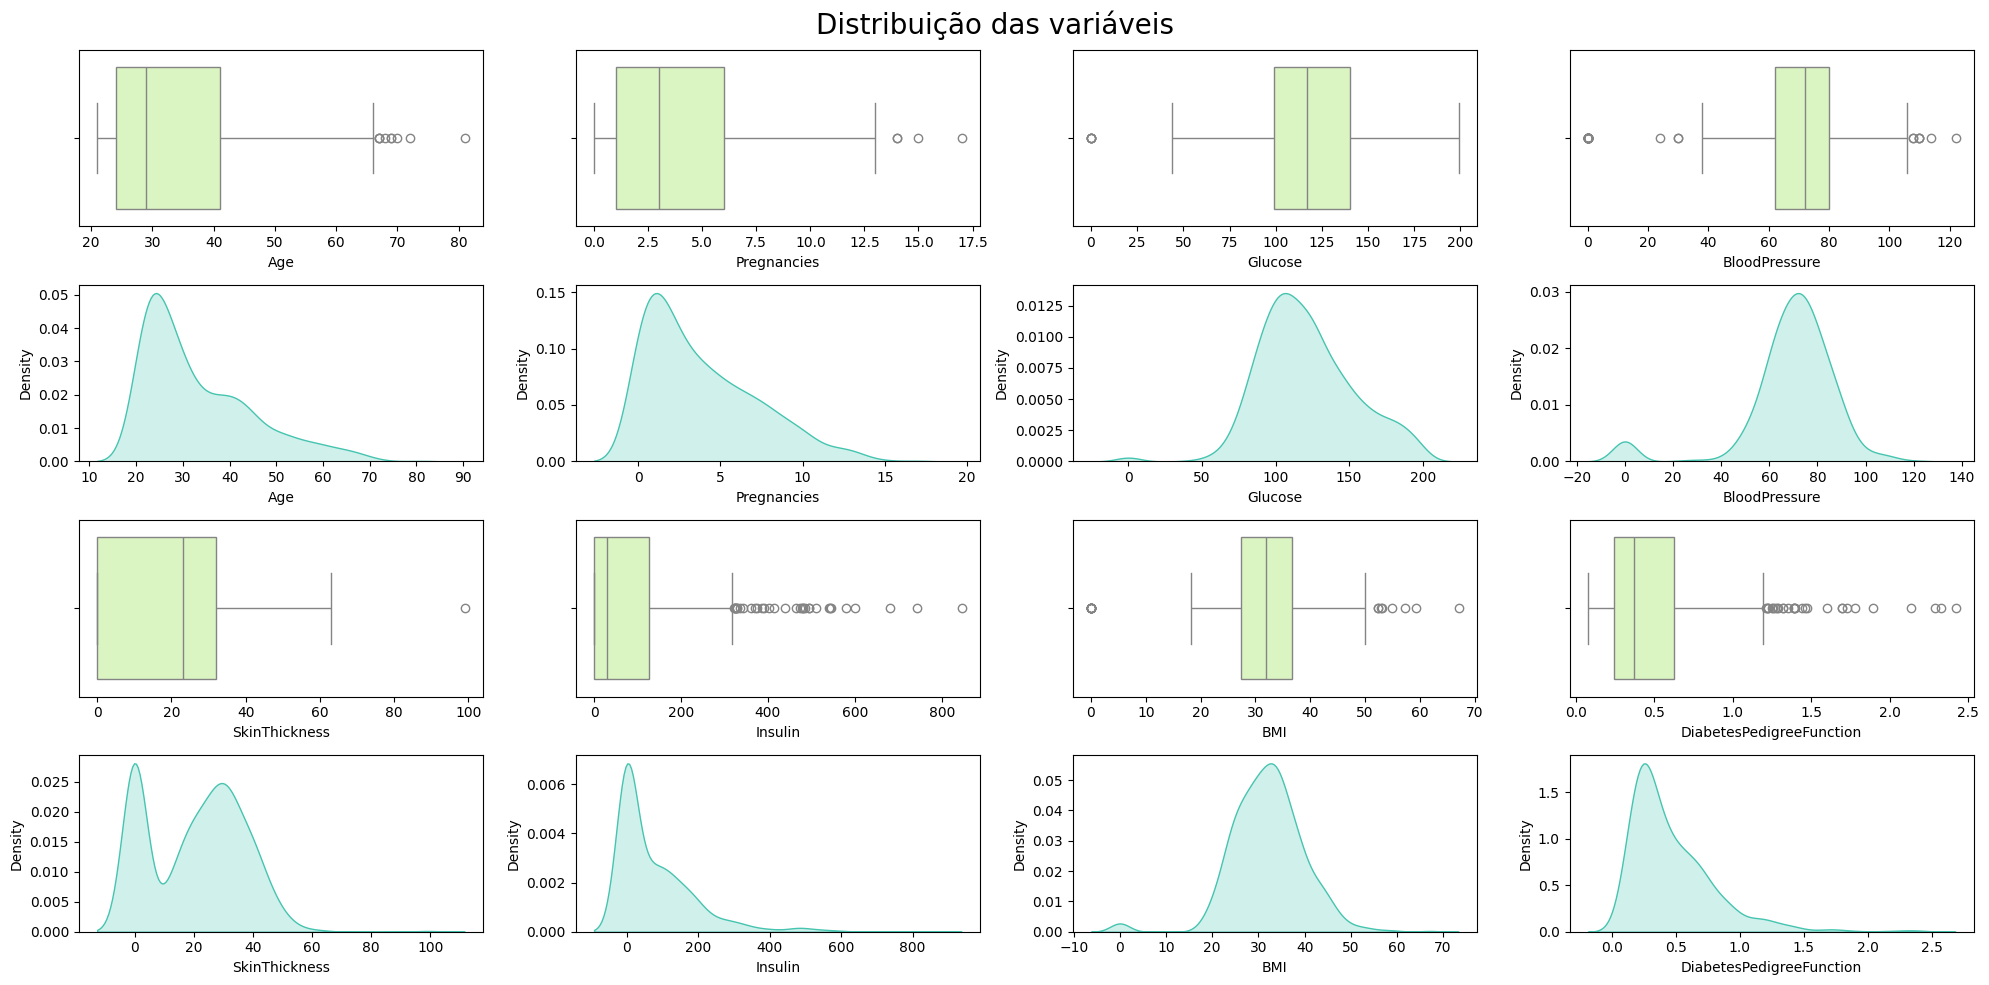

In [ ]:
#bloxpot das variáveis para explorar a distribuição dos dados

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))
fig.suptitle('Distribuição das variáveis', size=20)

#boxplot primeira linha
sns.boxplot(data=df, x='Age', color='#DAFDBA', ax=axes[0,0])

sns.boxplot(data=df, x='Pregnancies', color='#DAFDBA', ax=axes[0,1])

sns.boxplot(data=df, x='Glucose', color='#DAFDBA', ax=axes[0,2])

sns.boxplot(data=df, x='BloodPressure', color='#DAFDBA', ax=axes[0,3])

#kadeblot segunda linha
sns.kdeplot(data=df, x='Age', color='#45C4B0', fill=True, ax=axes[1,0])

sns.kdeplot(data=df, x='Pregnancies', color='#45C4B0', fill=True, ax=axes[1,1])

sns.kdeplot(data=df, x='Glucose', color='#45C4B0', fill=True, ax=axes[1,2])

sns.kdeplot(data=df, x='BloodPressure', color='#45C4B0', fill=True, ax=axes[1,3])

#boxplot terceira linha
sns.boxplot(data=df, x='SkinThickness', color='#DAFDBA', ax=axes[2,0])

sns.boxplot(data=df, x='Insulin', color='#DAFDBA', ax=axes[2,1])

sns.boxplot(data=df, x='BMI', color='#DAFDBA', ax=axes[2,2])

sns.boxplot(data=df, x='DiabetesPedigreeFunction', color='#DAFDBA', ax=axes[2,3])

#kdeplot
sns.kdeplot(data=df, x='SkinThickness', color='#45C4B0', fill=True, ax=axes[3,0])

sns.kdeplot(data=df, x='Insulin', color='#45C4B0', fill=True, ax=axes[3,1])

sns.kdeplot(data=df, x='BMI', color='#45C4B0', fill=True, ax=axes[3,2])

sns.kdeplot(data=df, x='DiabetesPedigreeFunction', color='#45C4B0', fill=True, ax=axes[3,3])

plt.tight_layout()
plt.show()

**nota**
apesar da avaliação inicial não apresentar valores faltantes, há diversos zeros, indicando ausência de dados. No caso da insulina e skinthinckness é tão volumoso, que pode chegar a deslocar a distribuição de dados e classificar como outlier números considerados normais ou esperados.

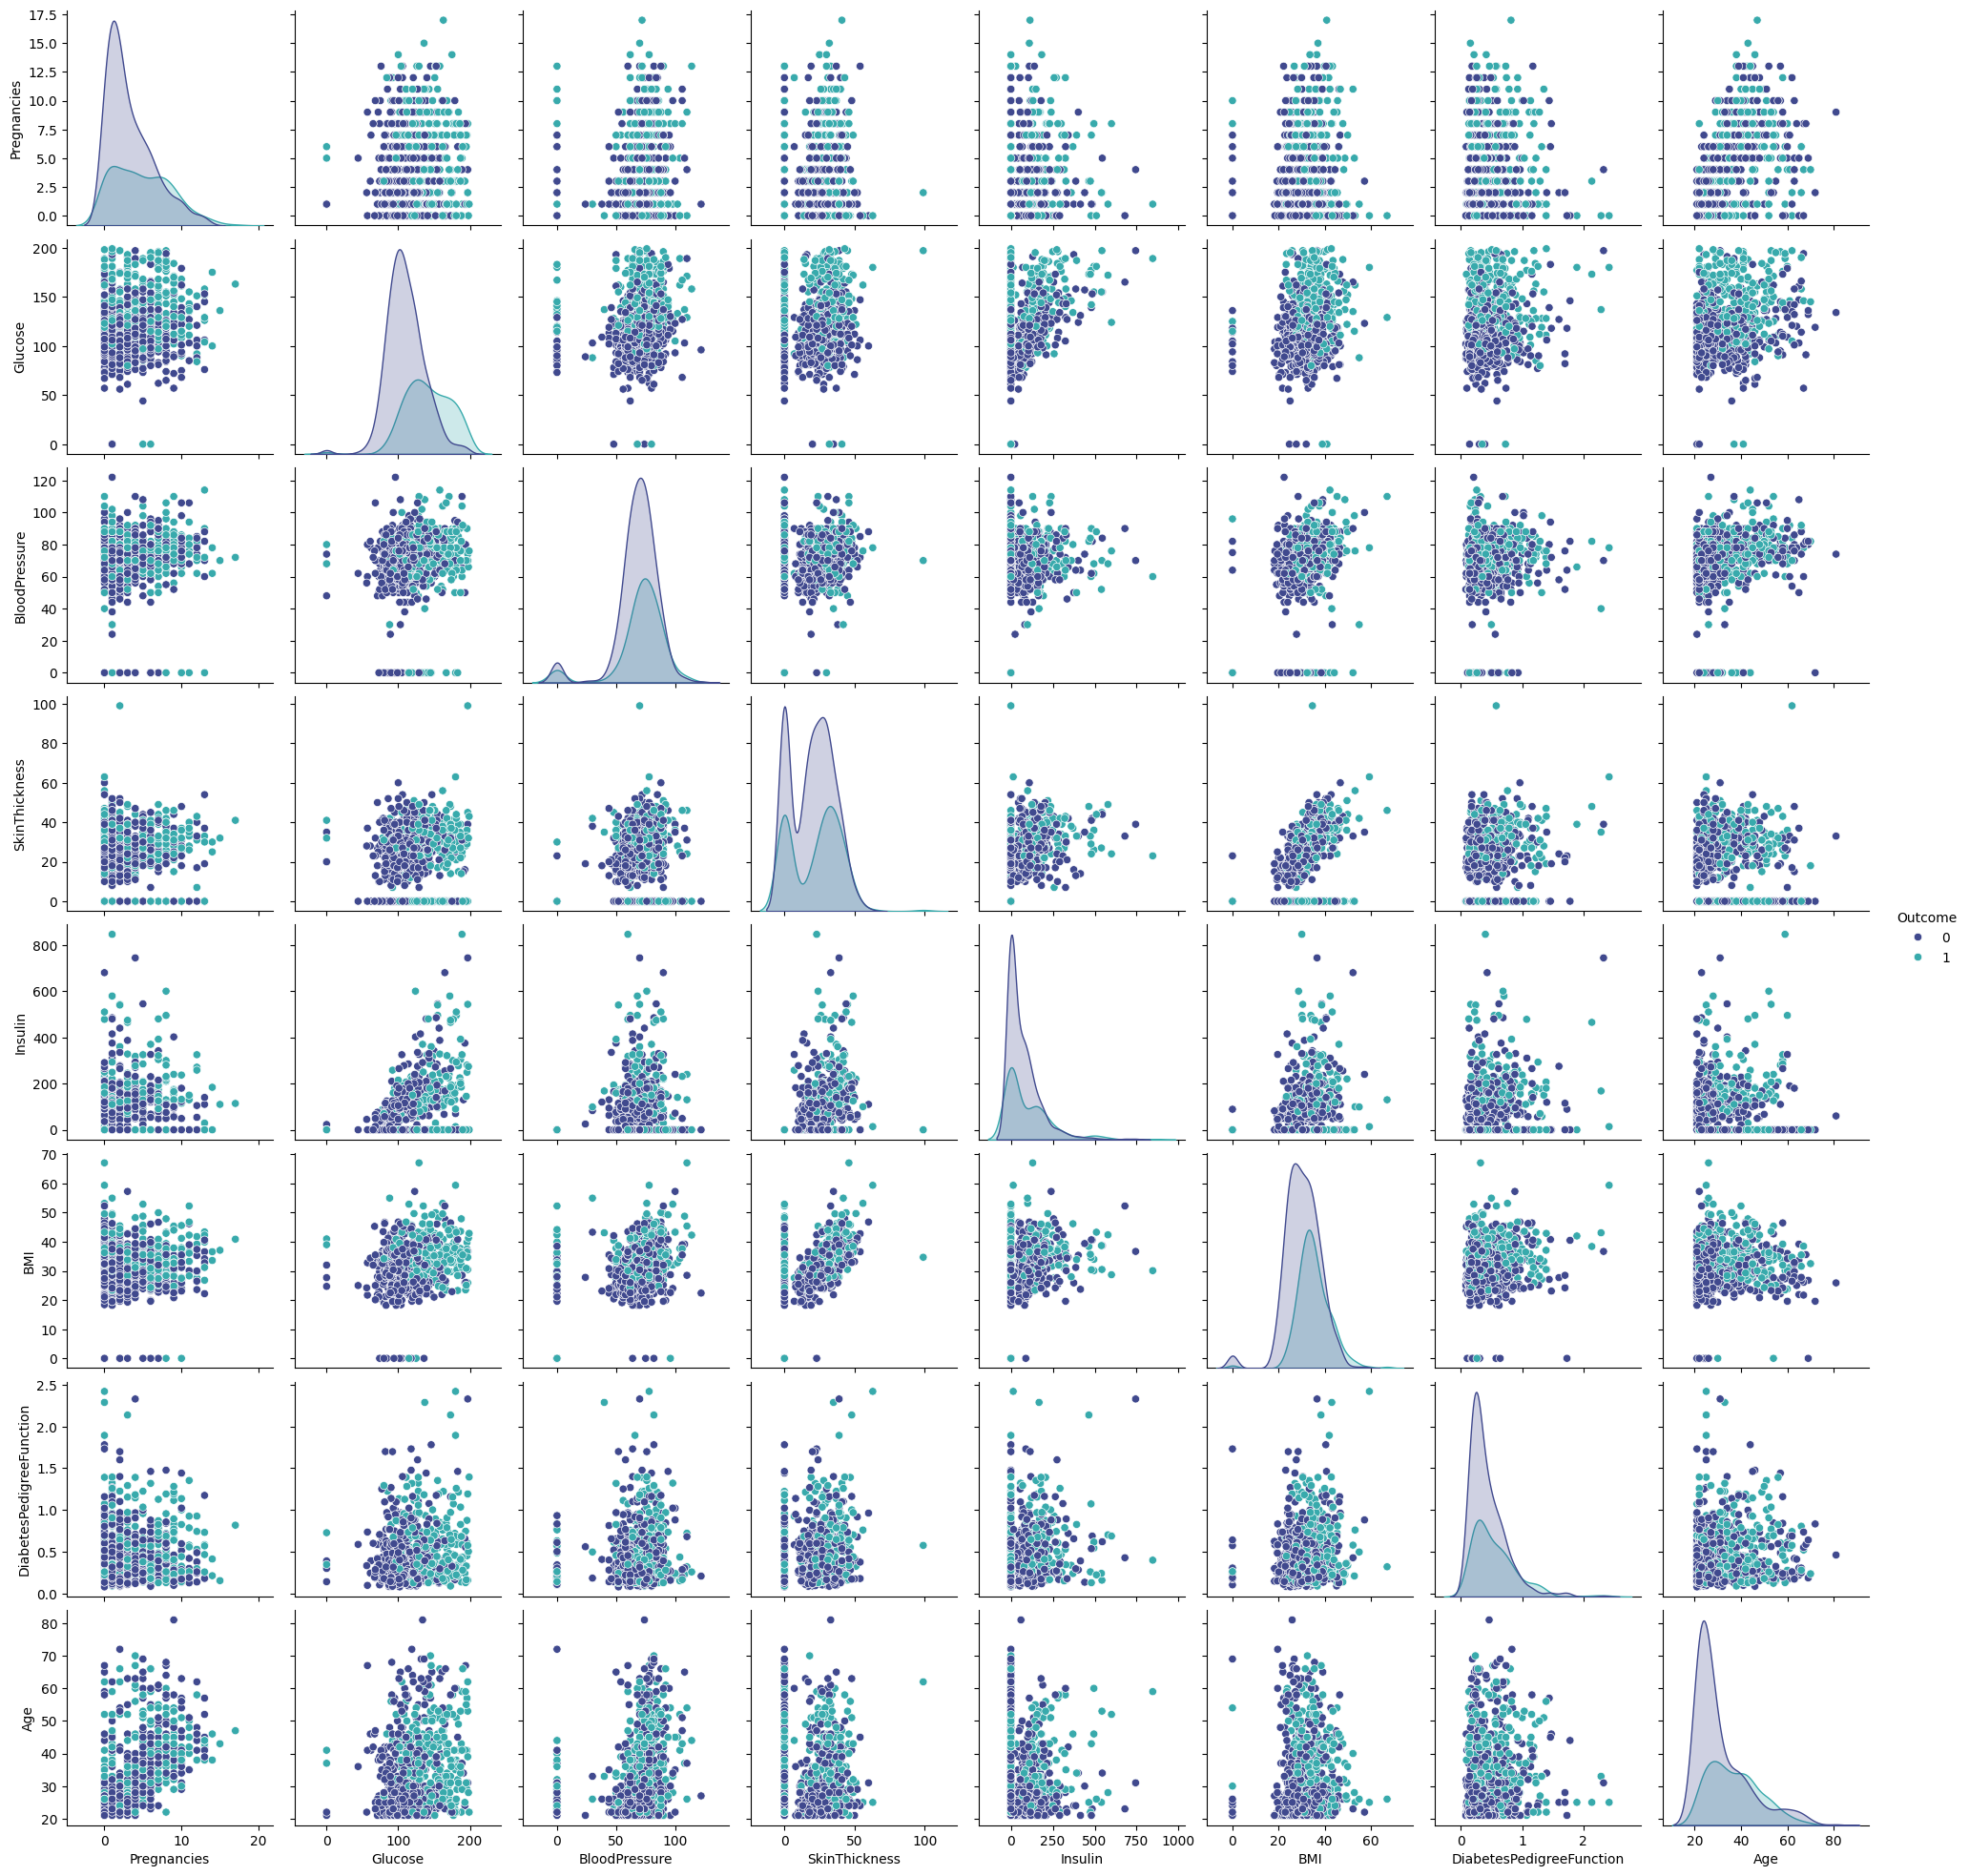

In [ ]:
#pairplot e diferenciação por desfecho
sns.pairplot(df, hue='Outcome', palette='mako')

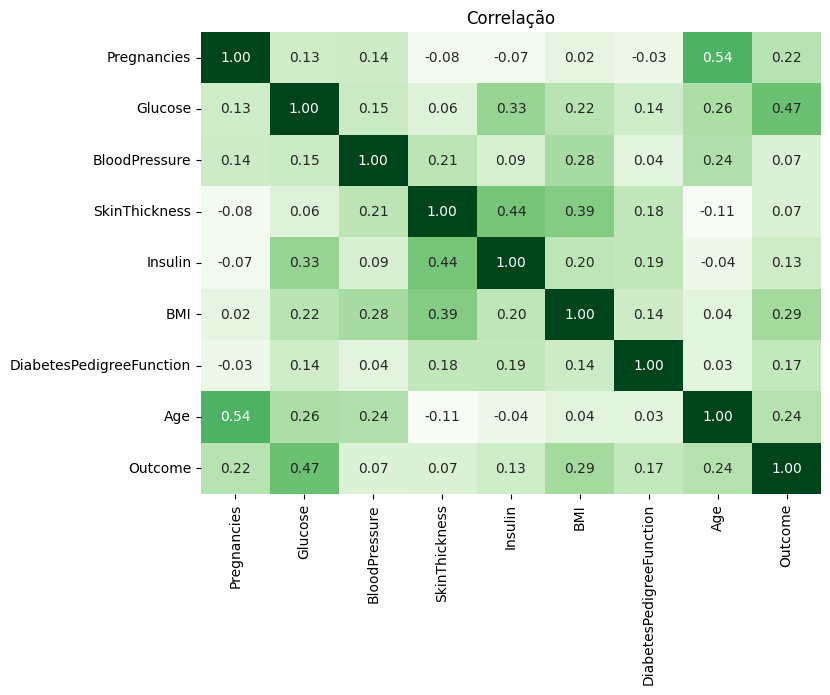

In [ ]:
#mapa de calor das features com o outcome, sem o tratamento sobre a ausencia de dados

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Greens', fmt='.2f', cbar=False)
plt.title('Correlação')
plt.show()

## Pré tratamento de dados


In [ ]:
#identificar os valores faltantes e a porcentagem do total de dados
df_copy = df.copy()
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)


print(df_copy.isnull().sum())
print("")
print(df_copy.isnull().mean())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64


In [ ]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


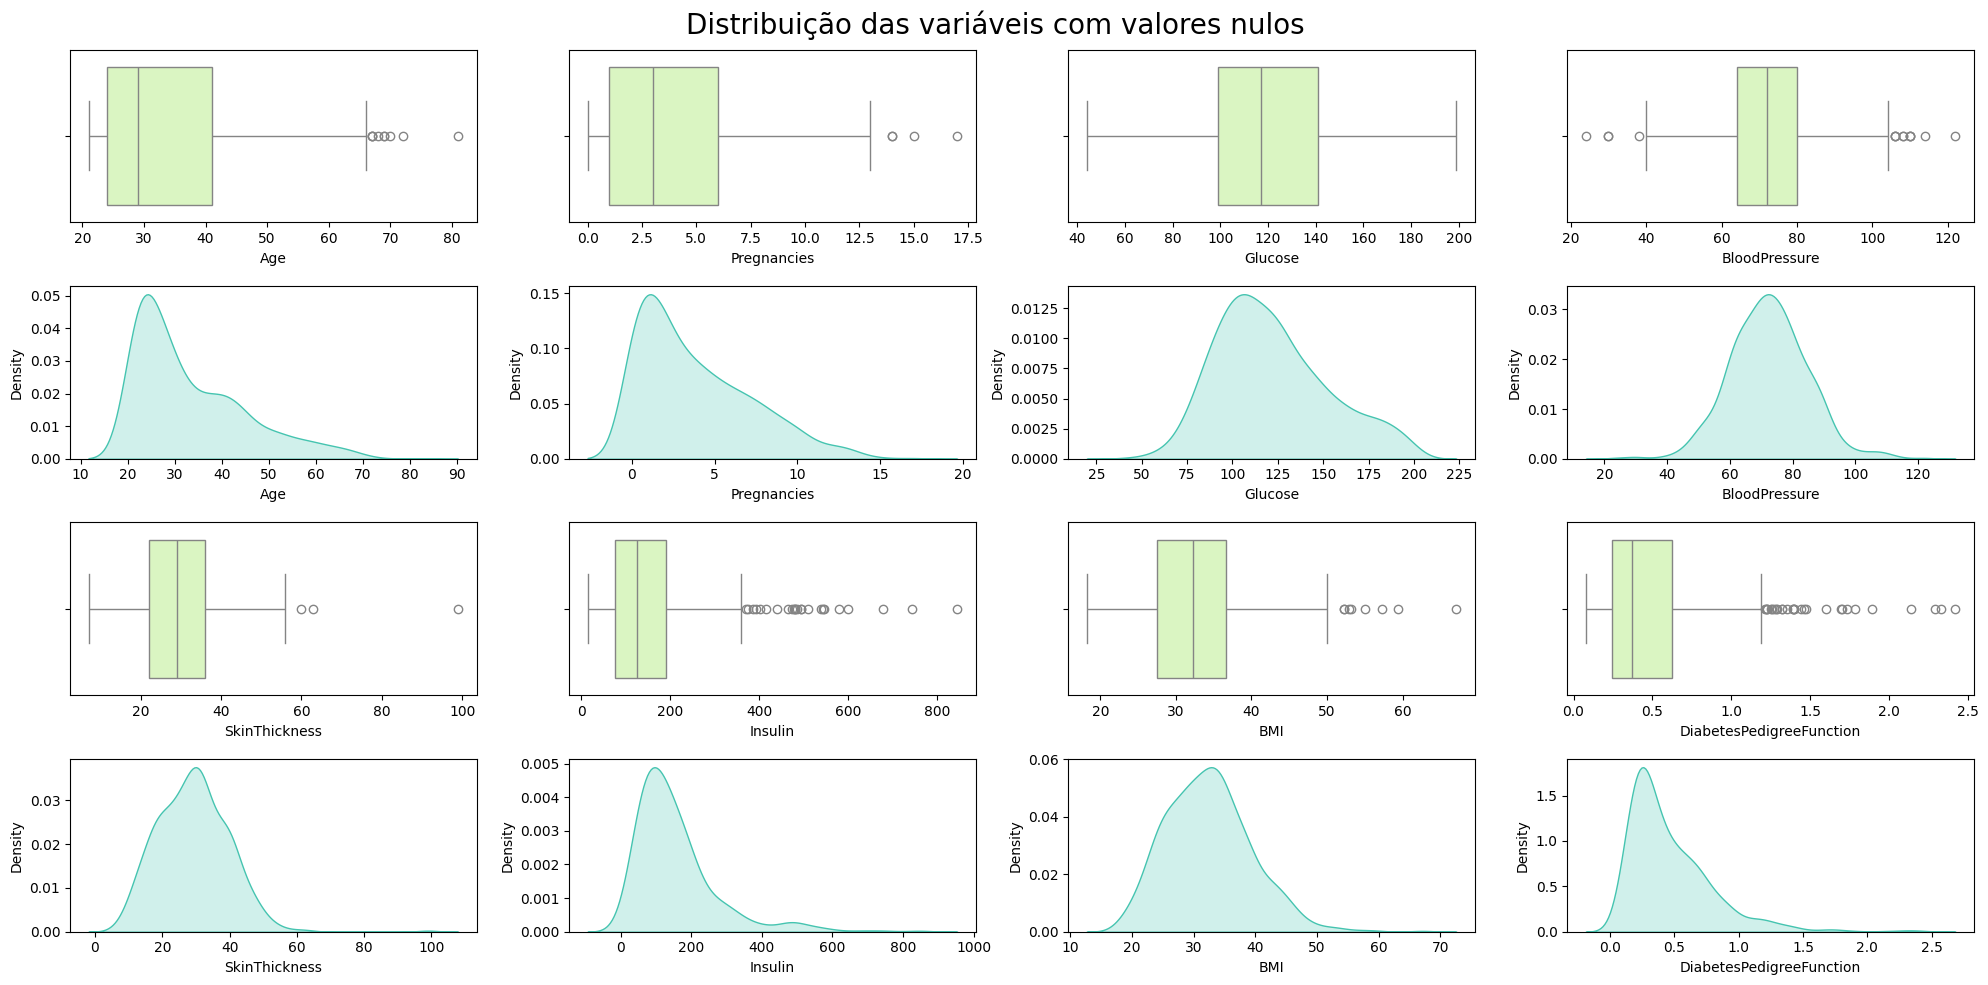

In [ ]:
#bloxpot das variáveis para explorar a distribuição dos dados - DF_COPY

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))
fig.suptitle('Distribuição das variáveis com valores nulos', size=20)

#boxplot primeira linha
sns.boxplot(data=df_copy, x='Age', color='#DAFDBA', ax=axes[0,0])

sns.boxplot(data=df_copy, x='Pregnancies', color='#DAFDBA', ax=axes[0,1])

sns.boxplot(data=df_copy, x='Glucose', color='#DAFDBA', ax=axes[0,2])

sns.boxplot(data=df_copy, x='BloodPressure', color='#DAFDBA', ax=axes[0,3])

#kadeblot segunda linha
sns.kdeplot(data=df_copy, x='Age', color='#45C4B0', fill=True, ax=axes[1,0])

sns.kdeplot(data=df_copy, x='Pregnancies', color='#45C4B0', fill=True, ax=axes[1,1])

sns.kdeplot(data=df_copy, x='Glucose', color='#45C4B0', fill=True, ax=axes[1,2])

sns.kdeplot(data=df_copy, x='BloodPressure', color='#45C4B0', fill=True, ax=axes[1,3])

#boxplot terceira linha
sns.boxplot(data=df_copy, x='SkinThickness', color='#DAFDBA', ax=axes[2,0])

sns.boxplot(data=df_copy, x='Insulin', color='#DAFDBA', ax=axes[2,1])

sns.boxplot(data=df_copy, x='BMI', color='#DAFDBA', ax=axes[2,2])

sns.boxplot(data=df_copy, x='DiabetesPedigreeFunction', color='#DAFDBA', ax=axes[2,3])

#kdeplot
sns.kdeplot(data=df_copy, x='SkinThickness', color='#45C4B0', fill=True, ax=axes[3,0])

sns.kdeplot(data=df_copy, x='Insulin', color='#45C4B0', fill=True, ax=axes[3,1])

sns.kdeplot(data=df_copy, x='BMI', color='#45C4B0', fill=True, ax=axes[3,2])

sns.kdeplot(data=df_copy, x='DiabetesPedigreeFunction', color='#45C4B0', fill=True, ax=axes[3,3])

plt.tight_layout()
plt.show()

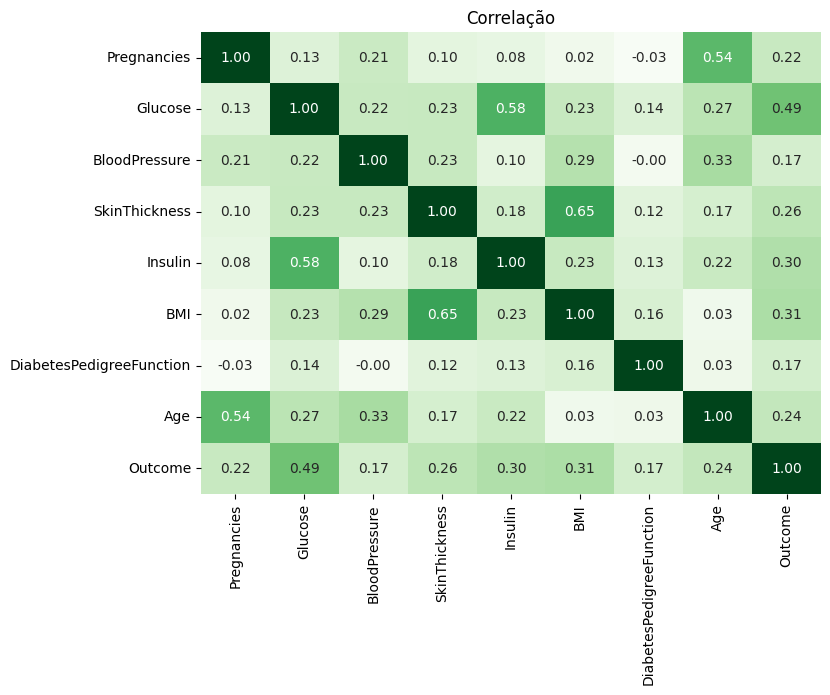

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_copy.corr(), annot=True, cmap='Greens', fmt='.2f', cbar=False)
plt.title('Correlação')
plt.show()

### Separação da base de dados em treino e teste

In [ ]:
#separação em base de treino e teste

X = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
print('taxa resposta treino:', y_train.mean())
print('taxa resposta teste:', y_test.mean())

taxa resposta treino: 0.3469055374592834
taxa resposta teste: 0.35714285714285715


##Modelos Preditivos e suas Métricas

In [ ]:
#aplicar o treino nos modelos e apresentar as métricas de cada um


In [ ]:
#lista de modelos
modelos_list = [
    LogisticRegression(random_state=42, solver= 'liblinear'),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42, max_depth=4),
    RandomForestClassifier(random_state=42, max_depth=4, n_estimators=100)
]

In [ ]:
#tratar os dados faltantes do treino com pipeline (insulina, skin, bloodpressure, glucose, bmi)
for modelo in modelos_list:
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('modelo', modelo)
    ])

    pipe.fit(X_train, y_train)

    print("\nModelo:", modelo)

    #acurácia do treino e do teste
    y_predit_train = pipe.predict(X_train)
    acc_train = accuracy_score(y_train, y_predit_train)
    print('acurácia do treino:', acc_train)

    y_predit_test = pipe.predict(X_test)
    acc_test = accuracy_score(y_test, y_predit_test)
    print('acurácia do teste:', acc_test)

    #determinação da probabilidade e sua distribuição em curva (auc), para treino e teste
    y_proba_train = pipe.predict_proba(X_train)
    y_proba_train_diabetes = y_proba_train[:,1]

    auc_train = roc_auc_score(y_train, y_proba_train_diabetes)
    print("AUC treino:", auc_train)

    y_proba_test = pipe.predict_proba(X_test)
    y_proba_test_diabetes = y_proba_test[:,1]

    auc_test = roc_auc_score(y_test, y_proba_test_diabetes)
    print("AUC teste:", auc_test)

    #print das métricas de classificação
    print("Classification Report :\n",classification_report(y_test,y_predit_test))

    #print da matrix de confusão
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_predit_test))

    print(' ')



Modelo: LogisticRegression(random_state=42, solver='liblinear')
acurácia do treino: 0.7703583061889251
acurácia do teste: 0.7532467532467533
AUC treino: 0.8467095172865957
AUC teste: 0.8229568411386594
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[82 17]
 [21 34]]
 

Modelo: KNeighborsClassifier()
acurácia do treino: 0.8192182410423453
acurácia do teste: 0.7142857142857143
AUC treino: 0.9007001276152342
AUC teste: 0.7546372819100091
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71   


Modelo: LogisticRegression(random_state=42, solver='liblinear')


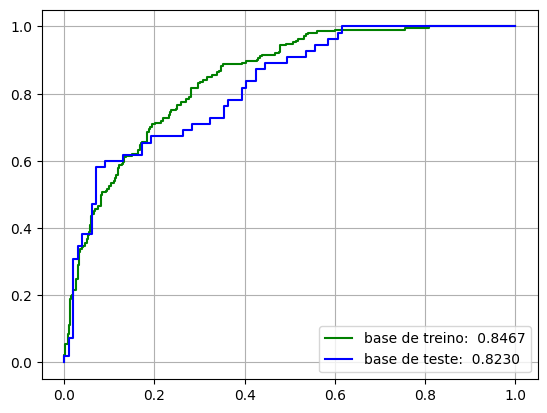

 

Modelo: KNeighborsClassifier()


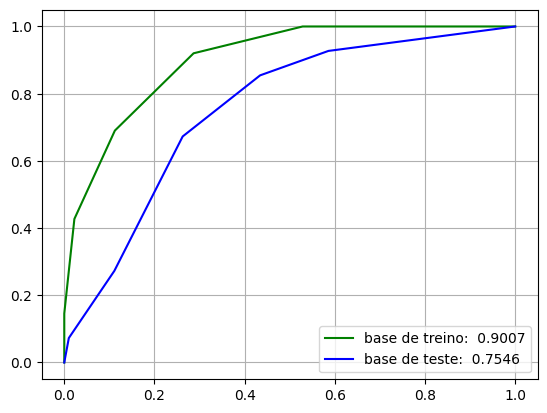

 

Modelo: DecisionTreeClassifier(max_depth=4, random_state=42)


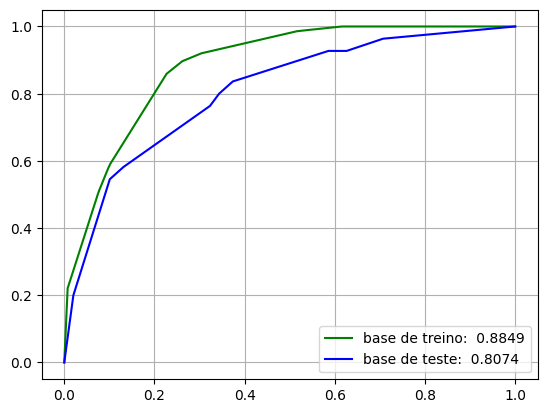

 

Modelo: RandomForestClassifier(max_depth=4, random_state=42)


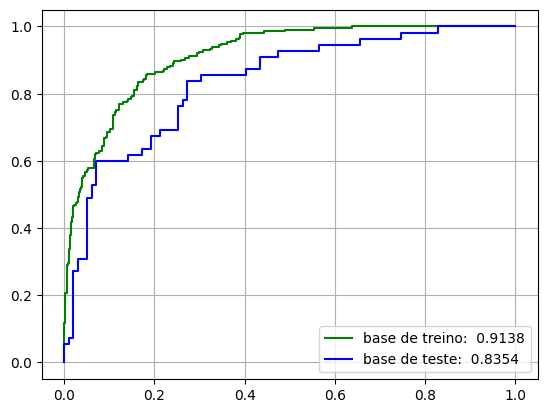

In [ ]:
#plotar métrica AUC e curva ROC para cada modelo
for modelo in modelos_list:
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('modelo', modelo)
    ])

    pipe.fit(X_train, y_train)

    print("\nModelo:", modelo)

    #determinação da probabilidade e sua distribuição em curva (auc), para treino e teste
    y_proba_train = pipe.predict_proba(X_train)
    y_proba_train_diabetes = y_proba_train[:,1]

    auc_train = roc_auc_score(y_train, y_proba_train_diabetes)
    #print("AUC treino:", auc_train)

    y_proba_test = pipe.predict_proba(X_test)
    y_proba_test_diabetes = y_proba_test[:,1]

    auc_test = roc_auc_score(y_test, y_proba_test_diabetes)
    #print("AUC teste:", auc_test)

    #gráfico
    fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train_diabetes)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test_diabetes)

    plt.plot(fpr_train, tpr_train, color='green')
    plt.plot(fpr_test, tpr_test, color='blue')
    plt.grid()
    plt.legend([f'base de treino: {auc_train: .4f}',f'base de teste: {auc_test: .4f}' ])
    plt.show()

    print(' ')



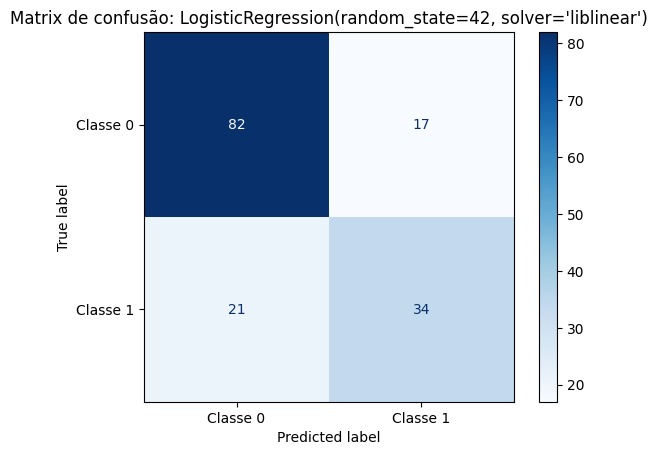

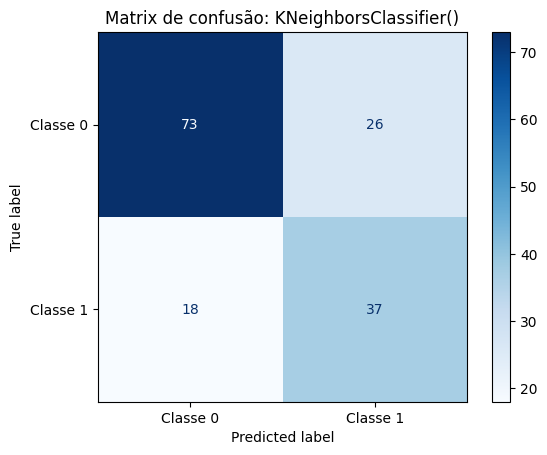

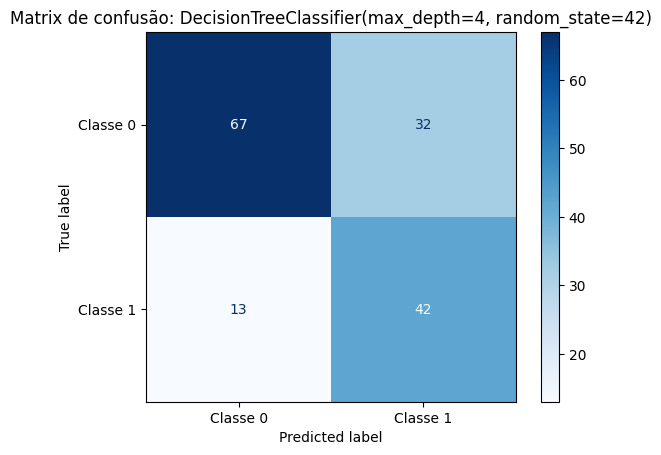

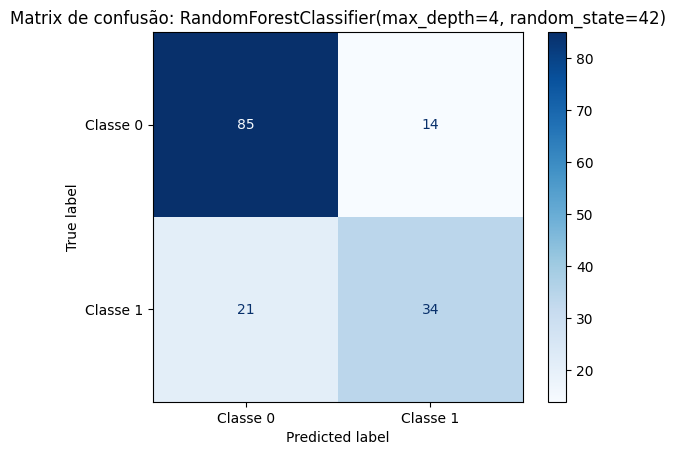

In [ ]:
#plotar a matrix de confusão para cada modelo
for modelo in modelos_list:
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('modelo', modelo)
    ])

    pipe.fit(X_train, y_train)

    y_predit_train = pipe.predict(X_train)
    y_predit_test = pipe.predict(X_test)

    # Definir os nomes das classes
    class_names = ['Classe 0', 'Classe 1']
    cm = confusion_matrix(y_test, y_predit_test)

      # Plotar a matriz de confusão com nomes corretos
    c_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    c_matrix.plot(cmap=plt.cm.Blues)
    plt.title(f'Matrix de confusão: {modelo}')
    print(' ')


espaço para testes


In [ ]:
# #criar função
# #acurácia
# y_predit_train = pipe.predict(X_train)
# acc_train = accuracy_score(y_train, y_predit_train)
# print('acurácia do treino:', acc_train)

# y_predit_test = pipe.predict(X_test)
# acc_test = accuracy_score(y_test, y_predit_test)
# #print('acurácia do teste:', acc_test)

In [ ]:
#criar função
#indice AUC
# y_proba_train = pipe.predict_proba(X_train)
# y_proba_train_diabetes = y_proba_train[:,1]

# auc_train = roc_auc_score(y_train, y_proba_train_diabetes)
# print("AUC treino:", auc_train)

# y_proba_test = pipe.predict_proba(X_test)
# y_proba_test_diabetes = y_proba_test[:,1]

# auc_test = roc_auc_score(y_test, y_proba_test_diabetes)
# print("AUC teste:", auc_test)

In [ ]:
# #criar função para o loop
# #gráfico
# fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train_diabetes)

# fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test_diabetes)

# plt.plot(fpr_train, tpr_train, color='green')
# plt.plot(fpr_test, tpr_test, color='blue')
# plt.grid()
# plt.legend([f'base de treino: {auc_train: .4f}',f'base de teste: {auc_test: .4f}' ])
# plt.show()


In [ ]:
# #criar função para o loop
# #matriz de confusão

# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Definir os nomes das classes
# class_names = ['Classe 0', 'Classe 1']

# cm = confusion_matrix(y_test, y_predit_test)

# # Plotar a matriz de confusão com nomes corretos
# c_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# #c_matrix.plot(cmap=plt.cm.Blues)